In [18]:
import numpy as np
import csv

In [19]:
N_TRACES   = 100      # rows
N_STEPS    = 800      # columns
SPIKE_IDXS = np.array([0, 100, 200, 300, 400, 500, 600, 700])
JITTER     = 5        # +- timesteps

In [20]:
traces = np.zeros((N_TRACES, N_STEPS), dtype=np.uint8)

for seed in range(N_TRACES):
    rng         = np.random.default_rng(seed)
    jitter      = rng.integers(-JITTER, JITTER + 1, size=SPIKE_IDXS.size)
    spike_cols  = np.clip(SPIKE_IDXS + jitter, 0, N_STEPS - 1)
    traces[seed, spike_cols] = 1

In [21]:
with open("input_traces_matrix.csv", "w", newline="") as f:
    writer = csv.writer(f)
    for row in traces:
        writer.writerow(row.tolist())

print("Saved", traces.shape, "matrix to input_traces_matrix.csv")

Saved (100, 800) matrix to input_traces_matrix.csv


In [23]:
import pandas as pd
df = pd.read_csv("input_traces_matrix.csv", header=None)
trace   = df.iloc[16].values          
spike_idxs = np.nonzero(trace)[0]     # positions of the eight spikes

print(spike_idxs)

[  0 101 204 299 403 496 600 698]


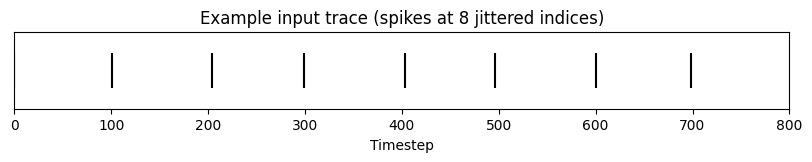

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 1))
plt.eventplot(np.where(trace == 1), lineoffsets=1, colors='black')
plt.xlim(0, 800)
plt.xlabel("Timestep")
plt.yticks([])
plt.title("Example input trace (spikes at 8 jittered indices)")
plt.show()

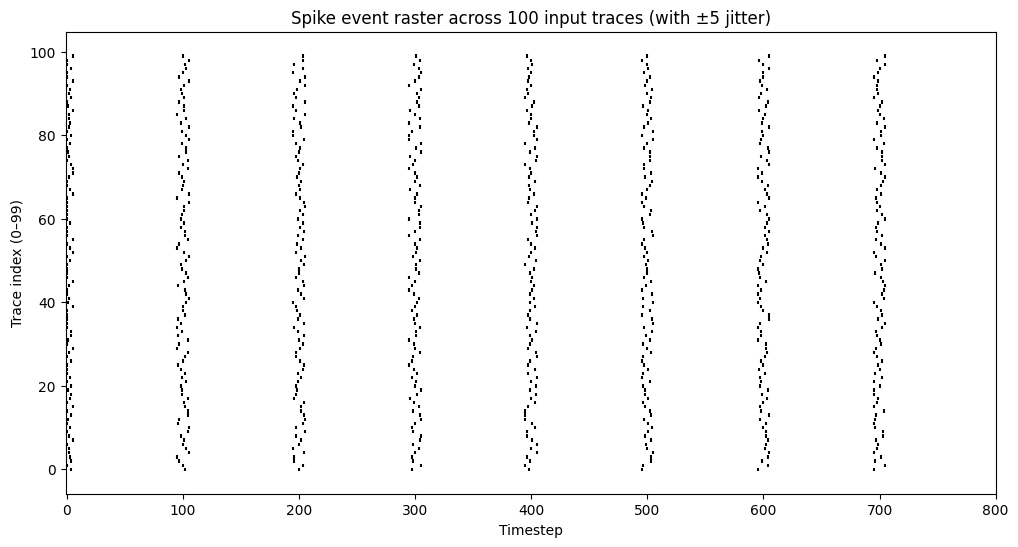

In [30]:
# Load your generated dataset
traces = np.loadtxt("input_traces_matrix.csv", delimiter=",", dtype=int)

# Get spike indices for each row (trace)
spike_indices_per_trace = [np.where(row == 1)[0] for row in traces]

plt.figure(figsize=(12, 6))
plt.eventplot(spike_indices_per_trace, linelengths=0.8, colors="black")
# from -1, since from 0 the spikes won't show
plt.xlim(-1, 800)
plt.xlabel("Timestep")
plt.ylabel("Trace index (0–99)")
plt.title("Spike event raster across 100 input traces (with ±5 jitter)")
plt.show()